# Hypothesis

Patients with advanced stage breast cancer have shorter survival times compared to those with early stage breast cancer.

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [5]:
# Loading clinical metadata
clinical_data = pd.read_csv("/kaggle/input/homework5-dataset/HW5clinical.csv", index_col=0)
print(clinical_data.head())

                                pam50       patient            sample  \
barcode                                                                 
TCGA-AC-A8OP-01A-11R-A36F-07     LumA  TCGA-AC-A8OP  TCGA-AC-A8OP-01A   
TCGA-D8-A1XU-01A-11R-A14M-07     LumA  TCGA-D8-A1XU  TCGA-D8-A1XU-01A   
TCGA-BH-A18L-01A-32R-A12D-07     LumB  TCGA-BH-A18L  TCGA-BH-A18L-01A   
TCGA-B6-A0IK-01A-12R-A056-07     Her2  TCGA-B6-A0IK  TCGA-B6-A0IK-01A   
TCGA-BH-A18L-11A-42R-A12D-07  Healthy  TCGA-BH-A18L  TCGA-BH-A18L-11A   

                             shortLetterCode           definition  \
barcode                                                             
TCGA-AC-A8OP-01A-11R-A36F-07              TP  Primary solid Tumor   
TCGA-D8-A1XU-01A-11R-A14M-07              TP  Primary solid Tumor   
TCGA-BH-A18L-01A-32R-A12D-07              TP  Primary solid Tumor   
TCGA-B6-A0IK-01A-12R-A056-07              TP  Primary solid Tumor   
TCGA-BH-A18L-11A-42R-A12D-07              NT  Solid Tissue Normal   

    

In [6]:
# Filtering relevant columns
data = clinical_data[['ajcc_pathologic_stage', 'days_to_death', 'vital_status']]

# Drop rows with missing values
data = data.dropna(subset=['ajcc_pathologic_stage', 'days_to_death'])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, TCGA-BH-A18L-01A-32R-A12D-07 to TCGA-B6-A0I1-01A-11R-A21T-07
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ajcc_pathologic_stage  190 non-null    object 
 1   days_to_death          190 non-null    float64
 2   vital_status           190 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.9+ KB
None


In [7]:
# Determine the unique stages available
stages = data['ajcc_pathologic_stage'].dropna().unique()
print(stages)

['Stage IIIA' 'Stage IIIB' 'Stage IIIC' 'Stage IIB' 'Stage IIA' 'Stage I'
 'Stage IV' 'Stage X' 'Stage III' 'Stage IA']


In [8]:
# Define a function to categorize stages
def categorize_stage(stage):
    if stage in ['Stage IA', 'Stage IB', 'Stage IIA', 'Stage IIB', 'Stage I']:
        return 'Early'
    elif stage in ['Stage IIIA', 'Stage IIIB', 'Stage IIIC', 'Stage III', 'Stage IV']:
        return 'Advanced'
    else:
        # Exclude 'Stage X' or any unclear stage
        return np.nan

# Applying the categorization
data['stage_category'] = data['ajcc_pathologic_stage'].apply(categorize_stage)

# Remove rows with undefined stages
data = data.dropna(subset=['stage_category'])

print(data.head())


                             ajcc_pathologic_stage  days_to_death  \
barcode                                                             
TCGA-BH-A18L-01A-32R-A12D-07            Stage IIIA          811.0   
TCGA-B6-A0IK-01A-12R-A056-07            Stage IIIB          571.0   
TCGA-BH-A18L-11A-42R-A12D-07            Stage IIIA          811.0   
TCGA-E2-A1LE-01A-12R-A19W-07            Stage IIIC          879.0   
TCGA-A8-A06U-01A-11R-A00Z-07             Stage IIB          883.0   

                             vital_status stage_category  
barcode                                                   
TCGA-BH-A18L-01A-32R-A12D-07         Dead       Advanced  
TCGA-B6-A0IK-01A-12R-A056-07         Dead       Advanced  
TCGA-BH-A18L-11A-42R-A12D-07         Dead       Advanced  
TCGA-E2-A1LE-01A-12R-A19W-07         Dead       Advanced  
TCGA-A8-A06U-01A-11R-A00Z-07         Dead          Early  


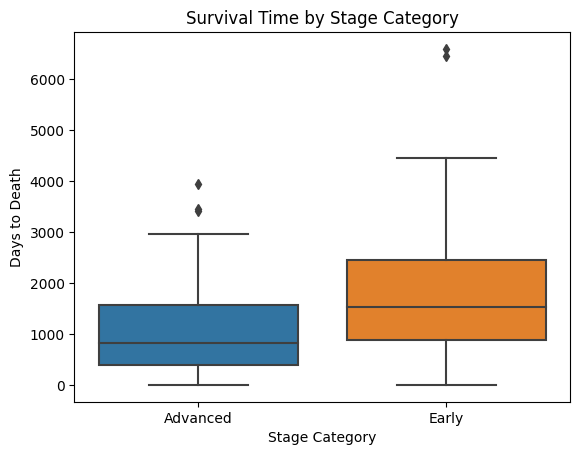

In [9]:
# Boxplot visualization
sns.boxplot(x='stage_category', y='days_to_death', data=data)
plt.title('Survival Time by Stage Category')
plt.ylabel('Days to Death')
plt.xlabel('Stage Category')
plt.show()

In [11]:
from scipy.stats import mannwhitneyu
# Statistical test
# Extract survival times for each group
early = data[data['stage_category'] == 'Early']['days_to_death']
advanced = data[data['stage_category'] == 'Advanced']['days_to_death']

# Perform test
stat, p_value = mannwhitneyu(early, advanced)
print(f"Mann-Whitney U Test: Statistic={stat}, p-value={p_value}")


Mann-Whitney U Test: Statistic=5343.0, p-value=4.935781722310381e-05
